# Отток клиентов

**Описание проекта**

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель проекта**

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

**План исследования**
1. Подготовка данных
2. Исследование задачи
3. Борьба с дисбалансом
4. Тестирование модели


**Описание данных**

*Признаки*
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

*Целевой признак*
* Exited — факт ухода клиента

## Подготовка данных

Импортируем библиотеки и функции.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

Изучим файл с данными.

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Удалим из данных уникальный идентификатор, фамилию и номер строки, так как они не влияют на факт ухода клиента.

In [4]:
data=data.drop(['CustomerId','Surname','RowNumber'],axis = 1)

Переименуем столбцы.

In [5]:
data = data.rename(columns = {'CreditScore':'credit_score',
                         'Geography':'geography',
                         'Gender':'gender',
                         'Age':'age',
                         'Tenure':'tenure',
                         'Balance':'balance',
                         'NumOfProducts':'num_of_products',
                         'HasCrCard':'has_cr_card',
                         'IsActiveMember':'is_active_member',
                         'EstimatedSalary':'estimated_salary',
                         'Exited':'exited'})

Удалим строки с пропущенными значениями в столбце 'tenure' (данных останется более 90%).

In [6]:
data = data.dropna(subset=['tenure']).reset_index(drop=True)

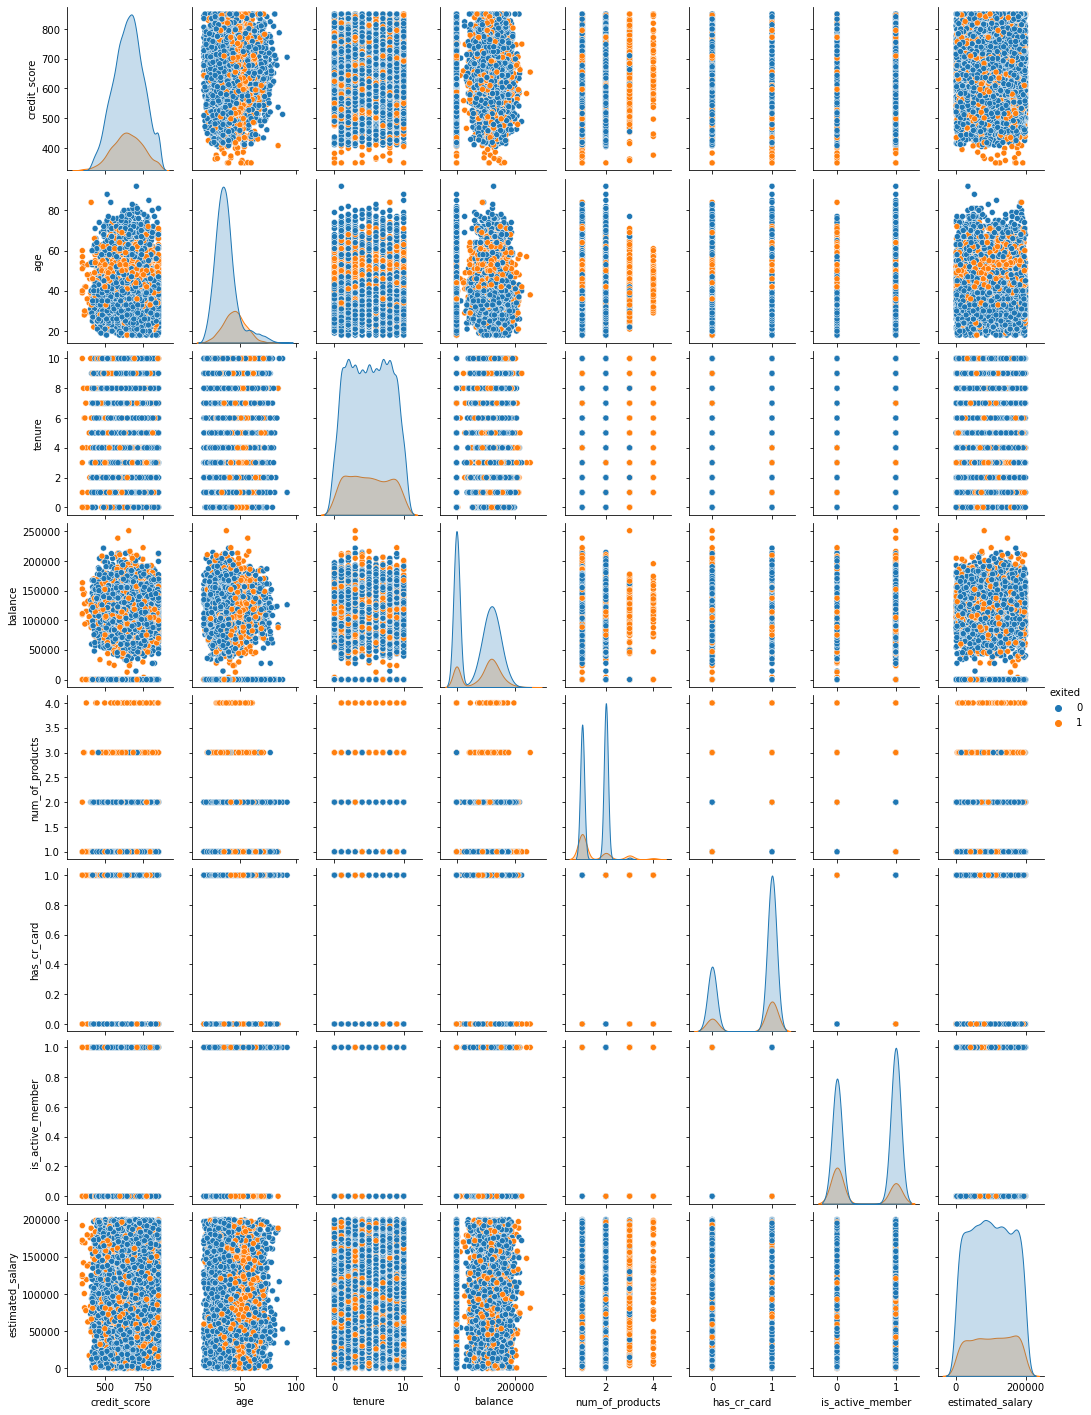

In [7]:
g = sns.pairplot(data, hue='exited');
g.fig.set_size_inches(15,20)

Проверим на наличие дубликатов.

In [8]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

Разделим данные на целевой признак и все остальные.

In [9]:
target = data['exited']
features = data.drop(['exited'],axis=1)

Разобьем данные на три выборки: обучающую (60%), валидационную (20%), тестовую (20%).

In [10]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.2, random_state = 12345)

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size = 0.25, random_state = 12345)

Проверим размеры получившихся выборок.

In [12]:
features_train.shape

(5454, 10)

In [13]:
features_valid.shape

(1819, 10)

In [14]:
features_test.shape

(1818, 10)

Преобразуем категориальные признаки техникой OHE.

In [15]:
features_train.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
3353,629,Spain,Female,44,6.0,125512.98,2,0,0,79082.76
6176,614,France,Female,35,1.0,0.00,2,1,1,3342.62
4020,666,France,Male,36,3.0,0.00,2,1,0,35156.54
535,683,Germany,Female,57,5.0,162448.69,1,0,0,9221.78
1661,737,France,Male,36,9.0,0.00,1,0,1,188670.90


In [16]:
warnings.filterwarnings("ignore")

In [17]:
calegorical = ['geography','gender']
enc = OneHotEncoder(drop='first')
enc.fit_transform(features_train[calegorical])
features_train_ohe = pd.DataFrame(enc.transform(features_train[calegorical]).toarray(),columns = enc.get_feature_names(calegorical),index=features_train.index)
features_valid_ohe = pd.DataFrame(enc.transform(features_valid[calegorical]).toarray(),columns = enc.get_feature_names(calegorical),index=features_valid.index)
features_test_ohe = pd.DataFrame(enc.transform(features_test[calegorical]).toarray(),columns = enc.get_feature_names(calegorical),index=features_test.index)

Численные признаки приведем к одному масштабу.

In [18]:
numeric = ['credit_score','age','balance','estimated_salary','tenure','num_of_products']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Соединим датафреймы после преобразований.

In [19]:
features_train = pd.concat((features_train.drop(calegorical,axis=1),features_train_ohe),axis = 1)
features_valid = pd.concat((features_valid.drop(calegorical,axis=1),features_valid_ohe),axis = 1)
features_test = pd.concat((features_test.drop(calegorical,axis=1),features_test_ohe),axis = 1)

Проверим датафреймы на совпадение столбцов.

In [20]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
3353,-0.203819,0.471273,0.352316,0.786022,0.782369,0,0,-0.357205,0.0,1.0,0.0
6176,-0.357513,-0.384930,-1.373506,-1.230577,0.782369,1,1,-1.671048,0.0,0.0,0.0
4020,0.175290,-0.289797,-0.683177,-1.230577,0.782369,1,0,-1.119181,0.0,0.0,1.0
535,0.349476,1.708010,0.007151,1.379462,-0.914942,0,0,-1.569064,1.0,0.0,0.0
1661,0.902771,-0.289797,1.387809,-1.230577,-0.914942,0,1,1.543790,0.0,0.0,1.0


In [21]:
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
769,0.779816,0.185872,0.697480,0.600726,-0.914942,1,1,0.295405,0.0,0.0,1.0
8841,-1.218194,0.566406,-1.373506,-1.230577,-0.914942,0,1,1.578362,0.0,0.0,0.0
1548,0.595385,-0.384930,-0.683177,-0.319996,-0.914942,1,0,-1.417009,0.0,1.0,0.0
7842,0.831047,-0.670331,1.387809,0.820545,-0.914942,0,0,-0.672521,0.0,0.0,0.0
4796,-0.685391,-0.860599,-1.028342,-1.230577,0.782369,1,1,0.561255,0.0,0.0,1.0


In [22]:
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
4350,-1.003024,1.232342,-1.373506,-1.230577,-0.914942,0,0,-0.626048,0.0,0.0,1.0
357,-0.941546,-0.575198,-0.683177,-0.354876,-0.914942,1,1,-1.722595,0.0,0.0,1.0
4660,-1.679273,-1.336267,-0.683177,0.929889,-0.914942,1,1,0.235764,0.0,0.0,0.0
8837,-1.259179,-0.670331,0.697480,0.786457,-0.914942,0,0,-0.223572,0.0,0.0,1.0
1805,-0.162835,0.376139,-0.683177,1.085690,-0.914942,1,1,1.022964,1.0,0.0,1.0


**Вывод**

1. Были изучены данные. Целевым признако является категориальный признак Exited — факт ухода клиента.


2. Были преобработаннны данные:

    2.1 Удалены столбцы, не влияющие на факт ухода клиента ('CustomerId','Surname','RowNumber').
    
    2.2 Переименнованы названия столбцов.
    
    2.3 Удалены строки с пропущенными значениями в столбце 'tenure' (данных осталось более 90%).
    
    2.4 Проведена проверка на наличие дубликатов. Дубликаты отсутствуют.
    
    2.5 Данные были разделены на три выборки: обучающую (60%), валидационную (20%), тестовую (20%).
    
    2.6 Преобразованы категориальные признаки техникой OHE.
    
    2.7 Численные признаки приведены к одному масштабу.

## Исследование задачи

Проверим соотношение классов.

In [23]:
data.loc[data['exited'] == 0].shape[0]/data.loc[data['exited'] == 1].shape[0]

3.9034519956850056

У признака "Факт ухода клиента" 0 почти в 4 раза больше, чем 1.

Изучим модели без учёта дисбаланса

**2.1 Дерево решений**

In [24]:
best_result_decision_tree = 0
best_model_decision_tree = None
best_depth_decision_tree = 0
best_auc_roc = 0

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train,target_train)   
    prediction_valid = model.predict(features_valid)
    result = f1_score(target_valid,prediction_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    
    if(result > best_result_decision_tree):
        best_result_decision_tree = result
        best_model_decision_tree = model
        best_depth_decision_tree = depth
        best_auc_roc = auc_roc
print("F1-мера наилучшей модели на валидационной выборке:", best_result_decision_tree, "Глубина дерева:", best_depth_decision_tree) 
print("AUC-ROC наилучшей модели на валидационной выборке:", best_auc_roc) 

F1-мера наилучшей модели на валидационной выборке: 0.5942684766214177 Глубина дерева: 9
AUC-ROC наилучшей модели на валидационной выборке: 0.8037790860667227


**2.2 Логическая регрессия**

In [25]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train,target_train)   
prediction_valid = model.predict(features_valid) 
result_logical_regression = f1_score(target_valid,prediction_valid)
print("F1-мера на валидационной выборке:", result_logical_regression) 

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("AUC-ROC на валидационной выборке:", auc_roc) 

F1-мера на валидационной выборке: 0.32653061224489793
AUC-ROC на валидационной выборке: 0.7881861508270254


**2.3 Случайный лес**

In [26]:
best_result_random_forest = 0
best_model_random_forest = None
best_depth_random_forest = 0
best_est_random_forest = 0
best_auc_roc = 0
for est in range(10, 100, 10):
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345,n_estimators=est, max_depth = depth)
        model.fit(features_train,target_train)   
        prediction_valid = model.predict(features_valid)
        result = f1_score(target_valid,prediction_valid)
            
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
        if(result > best_result_random_forest):
            best_result_random_forest = result
            best_model_random_forest = model
            best_depth_random_forest = depth
            best_est_random_forest = est
            best_auc_roc = auc_roc
print("F1-мера наилучшей модели на валидационной выборке:", best_result_random_forest, ". Глубина дерева:", best_depth_random_forest, '. est:',best_est_random_forest) 
print("AUC-ROC наилучшей модели на валидационной выборке:", best_auc_roc) 

F1-мера наилучшей модели на валидационной выборке: 0.5577264653641208 . Глубина дерева: 8 . est: 10
AUC-ROC наилучшей модели на валидационной выборке: 0.8587160078497337


**Вывод:**

1. Было выяснено, что в изначальных данных строк, где у признака "Факт ухода клиента" стоит 0 почти в 4 раза больше, чем 1.


2. Были построенны модели с использованием дерева решений, случайного леса и логической регрессии.

    Самый лучший результат показала модель дерево решений с глубиной дерева 9. Также неплохой результат показала модель случайный лес с параметрами глубина дерева depth 8, est 10.

## Борьба с дисбалансом

Для логической регрессии решим проблему с дисбалансом с помощью параметра class_weight = 'balanced'

In [27]:
model = LogisticRegression(class_weight = 'balanced', random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train,target_train)   
predictions_valid = model.predict(features_valid) 
result_logical_regression = f1_score(target_valid,predictions_valid)
print("F1-мера на валидационной выборке:", result_logical_regression) 

F1-мера на валидационной выборке: 0.5092322643343051


In [28]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("AUC-ROC на валидационной выборке:", auc_roc) 

AUC-ROC на валидационной выборке: 0.7880796187272218


Решим проблему дисбаланса для моделей дерево решений и случайного леса с помощью техники upsampling, то есть увеличим строки с содержанием в целевом признаке 1 в 4 раза.

In [29]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Найдем F1-меру и AUC-ROC для модели дерево решений с глубиной 9.

In [30]:
model = DecisionTreeClassifier(random_state=12345, max_depth = 9)
model.fit(features_upsampled,target_upsampled)   
prediction_valid = model.predict(features_valid)
result = f1_score(target_valid,prediction_valid)
print("F1-мера на валидационной выборке:", result)     

F1-мера на валидационной выборке: 0.5345717234262126


In [31]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("AUC-ROC на валидационной выборке:", auc_roc) 

AUC-ROC на валидационной выборке: 0.7840594336977853


Найдем F1-меру и AUC-ROC для модели случайного леса с глубиной дерева 8, est 10.

In [32]:
model = RandomForestClassifier(random_state=12345,n_estimators=10, max_depth = 8)
model.fit(features_upsampled,target_upsampled)   
prediction_valid = model.predict(features_valid)
result = f1_score(target_valid,prediction_valid)
print("F1-мера на валидационной выборке:", result)        

F1-мера на валидационной выборке: 0.6009070294784581


In [33]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("AUC-ROC на валидационной выборке:", auc_roc) 

AUC-ROC на валидационной выборке: 0.8515400429866369


Проверим как изменение порога может повлиять на f1-меру.

In [34]:
for threshold in np.arange(0, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    f1_mera = f1_score(target_valid,predicted_valid)
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    auc_roc = roc_auc_score(target_valid,predicted_valid)
    print("Порог = {:.2f} | f1-мера = {:.3f}, Точность = {:.3f}, Полнота = {:.3f},  AUC-ROC = {:.3f},".format(
        threshold, f1_mera, precision, recall, auc_roc))

Порог = 0.00 | f1-мера = 0.337, Точность = 0.203, Полнота = 1.000,  AUC-ROC = 0.500,
Порог = 0.02 | f1-мера = 0.338, Точность = 0.203, Полнота = 1.000,  AUC-ROC = 0.501,
Порог = 0.04 | f1-мера = 0.340, Точность = 0.205, Полнота = 1.000,  AUC-ROC = 0.506,
Порог = 0.06 | f1-мера = 0.344, Точность = 0.208, Полнота = 0.997,  AUC-ROC = 0.516,
Порог = 0.08 | f1-мера = 0.354, Точность = 0.215, Полнота = 0.997,  AUC-ROC = 0.537,
Порог = 0.10 | f1-мера = 0.362, Точность = 0.222, Полнота = 0.992,  AUC-ROC = 0.552,
Порог = 0.12 | f1-мера = 0.373, Точность = 0.230, Полнота = 0.984,  AUC-ROC = 0.573,
Порог = 0.14 | f1-мера = 0.385, Точность = 0.239, Полнота = 0.984,  AUC-ROC = 0.594,
Порог = 0.16 | f1-мера = 0.397, Точность = 0.249, Полнота = 0.976,  AUC-ROC = 0.614,
Порог = 0.18 | f1-мера = 0.410, Точность = 0.260, Полнота = 0.962,  AUC-ROC = 0.633,
Порог = 0.20 | f1-мера = 0.425, Точность = 0.274, Полнота = 0.951,  AUC-ROC = 0.655,
Порог = 0.22 | f1-мера = 0.439, Точность = 0.286, Полнота = 0.943

Нужная нам f1-мера достигается при пороге более 0.48. AUC-ROC равно максимальному значению 0.774 при пороге 0.5.

**Вывод**

1. Для логической регрессии была решила проблема с дисбалансом с помощью параметра class_weight = 'balanced'.

    f1-мера получила значение 0.51, AUC-ROC - значение 0.79.
    
    
2. Для моделей дерево решений и случайного леса была решила проблема с дисбалансом с помощью техники upsampling, то есть увеличения строки с содержанием в целевом признаке 1 в 4 раза. 
    
    Для модели дерево решений с глубиной 9 f1-мера получила значение 0.53, AUC-ROC - значение 0.78.
    
    Для модели случайного леса с глубиной дерева 8, est 10 f1-мера получила значение 0.60, AUC-ROC - значение 0.85.
    
    
3. Было проверено, как изменение порога может повлиять на f1-меру.

    Нужная нам f1-мера достигается при пороге более 0.48. AUC-ROC равно максимальному значению 0.774 при пороге 0.5.

## Тестирование модели

Проверим модель случайного леса с параметрами depth 8, est 10 на тестовой выборке.

In [35]:
model = RandomForestClassifier(random_state=12345,n_estimators=10, max_depth = 8)
model.fit(features_upsampled,target_upsampled)
predicted_test = model.predict(features_test)
f1_mera = f1_score(target_test,predicted_test)
print("F1-мера на валидационной выборке:", f1_mera) 

F1-мера на валидационной выборке: 0.5974025974025974


In [36]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test,probabilities_one_test)
print("AUC-ROC на валидационной выборке:", auc_roc) 

AUC-ROC на валидационной выборке: 0.8446790934682142


**Вывод:**

Модель случайного леса с параметрами depth 8, est 10 успешно протестирована, F1-мера достигла значения 0.597, AUC-ROC - значение 0.84.

## Общий вывод

1. Подготовка данных

    1.1 Были изучены данные. Целевым признако является категориальный признак Exited — факт ухода клиента.


    1.2 Были преобработаннны данные:

        1.2.1 Удалены столбцы, не влияющие на факт ухода клиента ('CustomerId','Surname','RowNumber').
    
        1.2.2 Переименнованы названия столбцов.
    
        1.2.3 Удалены строки с пропущенными значениями в столбце 'tenure' (данных осталось более 90%).
    
        1.2.4 Проведена проверка на наличие дубликатов. Дубликаты отсутствуют.
    
        1.2.5 Данные были разделены на три выборки: обучающую (60%), валидационную (20%), тестовую (20%).
    
        1.2.6 Преобразованы категориальные признаки техникой OHE.
    
        1.2.7 Численные признаки приведены к одному масштабу.
        
2. Исследование задачи
    
    2.1 Было выяснено, что в изначальных данных строк, где у признака "Факт ухода клиента" стоит 0 почти в 4 раза больше, чем 1.
    
    2.2 Были построенны модели с использованием дерева решений, случайного леса и логической регрессии.

    Самый лучший результат показала модель дерево решений с глубиной дерева 9. Также неплохой результат показала модель случайный лес с параметрами глубина дерева depth 8, est 10.
    
    
3. Борьба с дисбалансом

    3.1 Для логической регрессии была решила проблема с дисбалансом с помощью параметра class_weight = 'balanced'.

        f1-мера получила значение 0.51, AUC-ROC - значение 0.79.


    3.2 Для моделей дерево решений и случайного леса была решила проблема с дисбалансом с помощью техники upsampling, то есть увеличения строки с содержанием в целевом признаке 1 в 4 раза. 

        Для модели дерево решений с глубиной 9 f1-мера получила значение 0.53, AUC-ROC - значение 0.78.

        Для модели случайного леса с глубиной дерева 8, est 10 f1-мера получила значение 0.60, AUC-ROC - значение 0.85.


    3.3 Было проверено, как изменение порога может повлиять на f1-меру.

        Нужная нам f1-мера достигается при пороге более 0.48. AUC-ROC равно максимальному значению 0.774 при пороге 0.5.
    
4. Тестирование модели

    Модель случайного леса с параметрами depth 8, est 10 успешно протестирована, F1-мера достигла значения 0.597, AUC-ROC - значение 0.84.